# HFT Coursework

### Question 1

Import necessary libraries for Data Analysis.

Scipy --> Load matlab data.

Panda --> Data Structure

Numpy --> mathematical operations which are needed in calculating Volume Imbalance

Matplotlib --> Ploting the graphs.

In [1]:
import scipy.io as sio  
# for loading matlab data

import numpy as np      
# for numerical libs

import pandas as pd

from matplotlib.ticker import FuncFormatter 
# for custom bar plot labels

import matplotlib.pyplot as plt  
# for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
data = sio.loadmat('AMZN_20141126.mat')

### Load Data

In [3]:
LOB = data['LOB']
# Limit Order Book

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO = np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

### Midprice

In [4]:
Midprice = 0.5*(bid[:,0]+ask[:,0])
Midprice

array([334.385, 334.08 , 334.08 , ..., 333.535, 333.535, 333.54 ])

In [5]:
Midprice = pd.DataFrame(Midprice)
Midprice.describe().round(2)

# Descriptive Statistics for midprice 

,0
count,234000.00
mean,333.32
std,0.50
min,331.82
25%,332.96
50%,333.28
75%,333.75
max,334.64


In [6]:
Midprice.head().round(2)

# Read the first 5 rows of midprice

,0
0,334.38
1,334.08
2,334.08
3,334.08
4,334.00


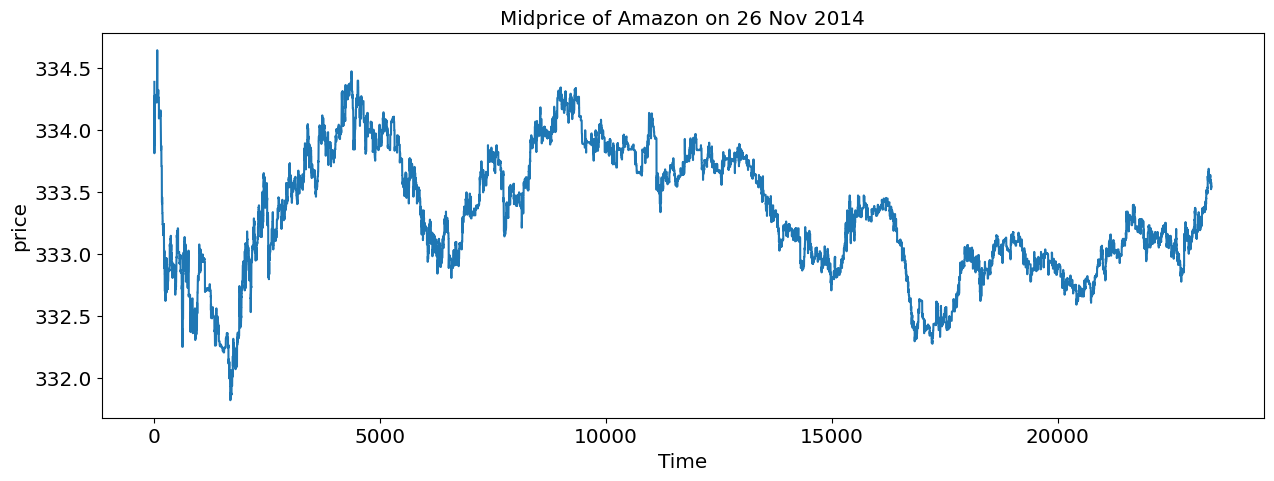

In [7]:
plt.plot(t, Midprice)
plt.title('Midprice of Amazon on 26 Nov 2014')
plt.ylabel('price')
plt.xlabel('Time')
plt.show()

### Microprice

In [8]:
Microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
Microprice = pd.DataFrame(Microprice)

In [9]:
Microprice.describe().round(2)

,0
count,234000.00
mean,333.31
std,0.50
min,331.79
25%,332.95
50%,333.27
75%,333.75
max,334.75


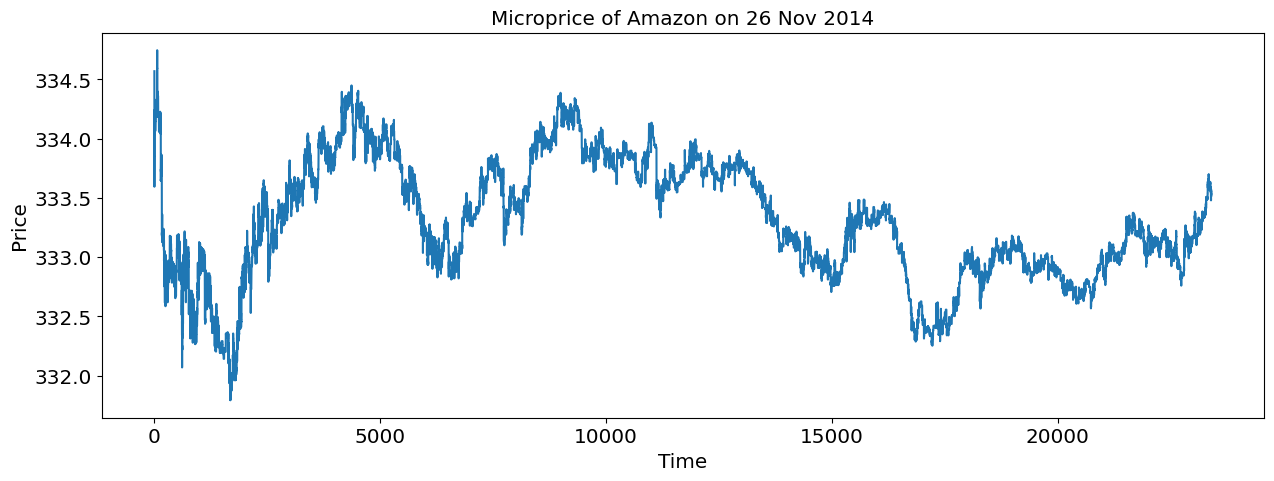

In [10]:
plt.plot(t, Microprice)
plt.title('Microprice of Amazon on 26 Nov 2014')
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()

### Plot the difference between micro and mid prices

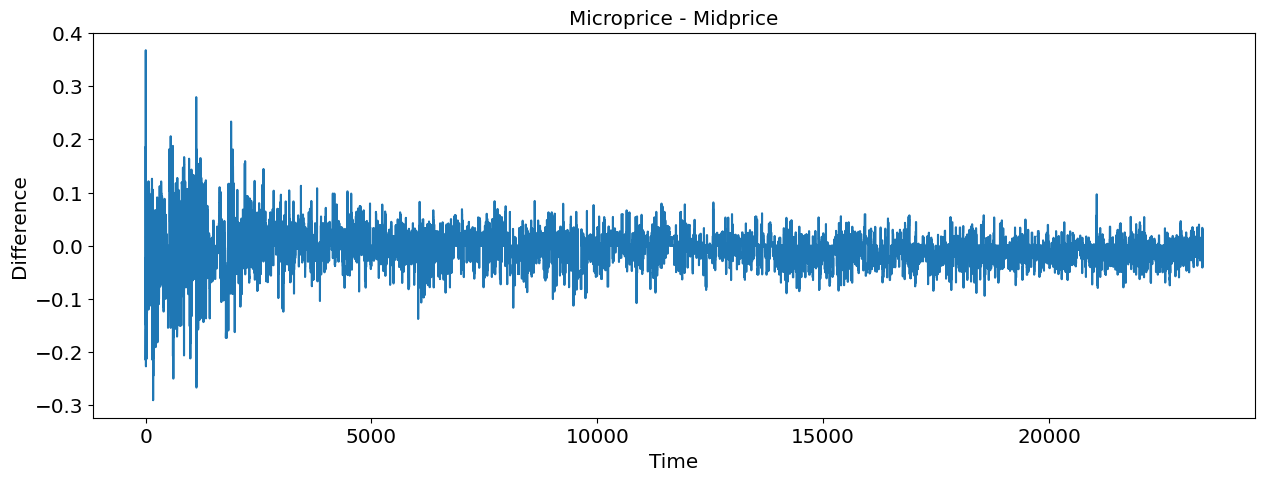

In [11]:
plt.plot(t, Microprice-Midprice)
plt.title('Microprice - Midprice')
plt.ylabel('Difference')
plt.xlabel('Time')
plt.show()

The difference is typically in the range [-0.01, 0.01] while at the beginning of the day, it is more than three times as large.

### Spread

In [12]:
Spread = ask[:,0] - bid[:,0]
Spread = pd.DataFrame(Spread)
Spread

,0
0,0.43
1,0.62
2,0.62
3,0.62
4,0.46
...,...
233995,0.03
233996,0.03
233997,0.03
233998,0.03


In [13]:
Spread = pd.DataFrame(Spread)
Spread.describe().round(2)

,0
count,234000.00
mean,0.13
std,0.07
min,0.01
25%,0.09
50%,0.12
75%,0.15
max,0.75


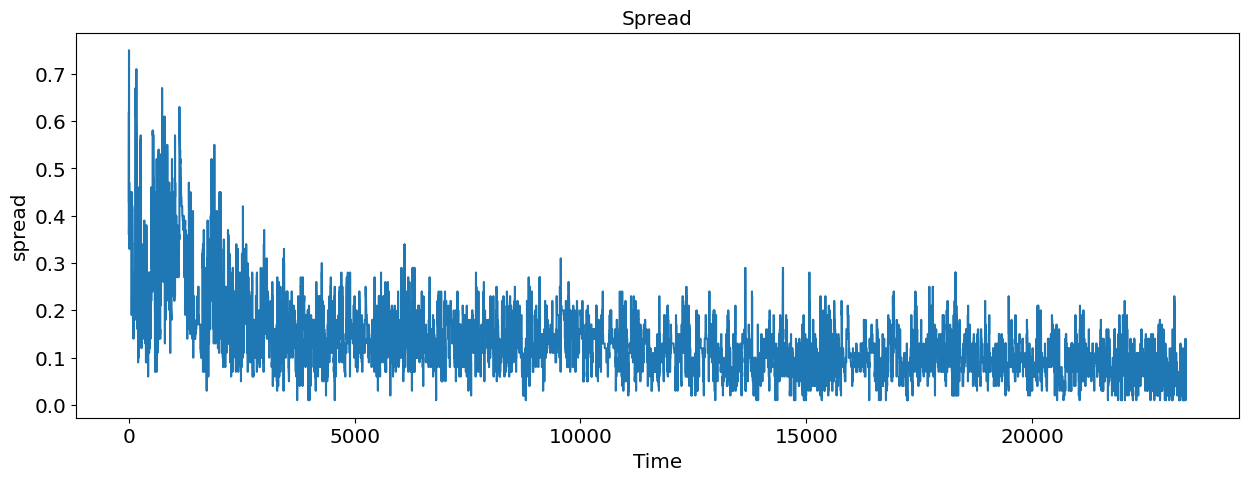

In [14]:
plt.plot(t,Spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('Time')
plt.show()

This plot shows that the spread is about 0.8 in the morning, but quickly drops to near 0 but for most of time, it fluctuates between 0 and 0.3.

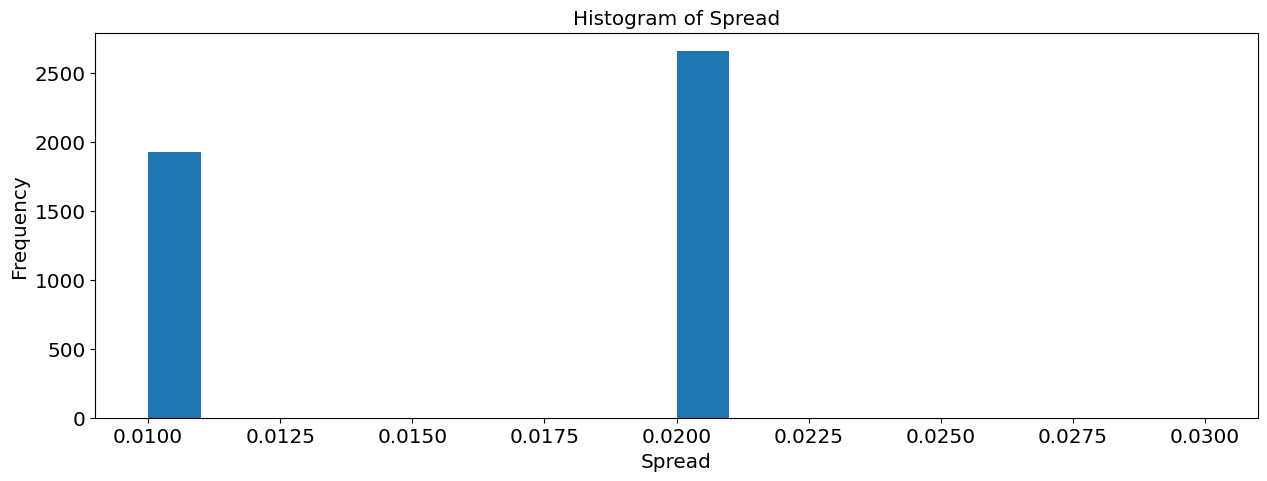

In [15]:
plt.hist(Spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Histogram of Spread")
plt.xlabel(r'Spread')
plt.ylabel('Frequency')
plt.show()

### Volume Imbalance

In [16]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T
rho

array([[ 0.86046512],
       [ 0.6       ],
       [ 0.6       ],
       ...,
       [ 0.33333333],
       [ 0.33333333],
       [-0.22178988]])

In [17]:
rho = pd.DataFrame(rho)
rho.describe().round(2)

,0
count,234000.00
mean,-0.12
std,0.45
min,-1.00
25%,-0.33
50%,0.00
75%,0.08
max,1.00


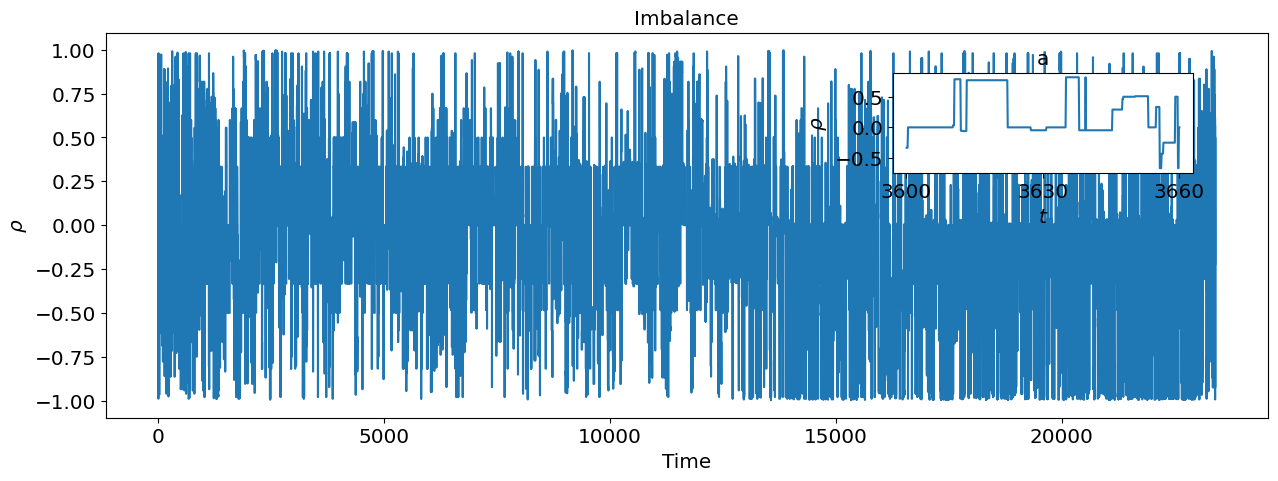

In [18]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('Time')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

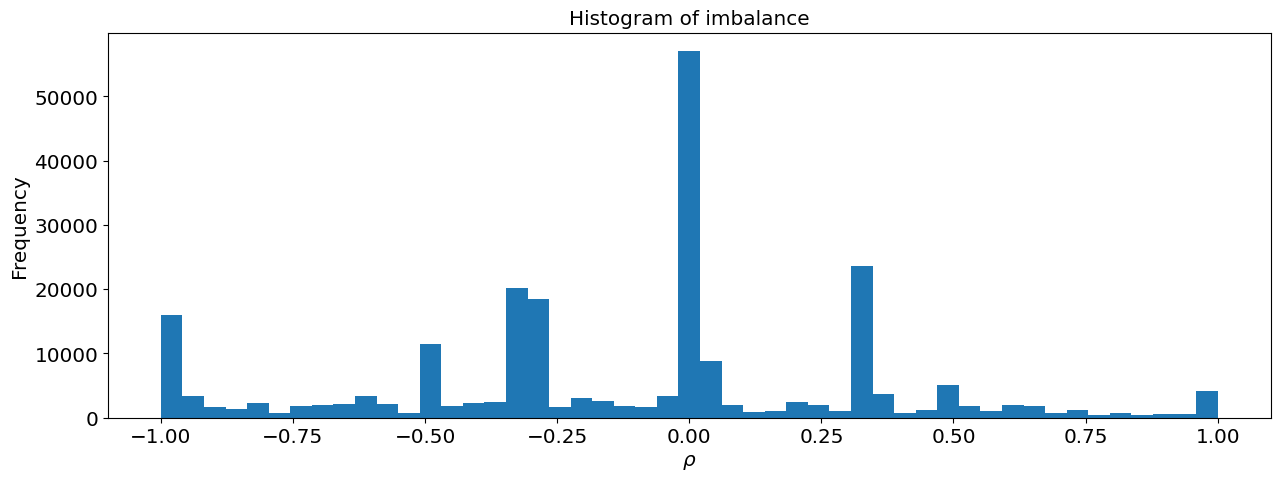

In [19]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Histogram of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Frequency')
plt.show()

### Question2:

In [20]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


### Set up Parameters

In [22]:
# parameters
S0 = 100;     # Stock price (Irrelevant)
N = 10 ** 6;  # Initial number of stocks
T = 1; 
k = 1e-3;     # Temporary price impact
b = 0.001;    # Permenent price impact
M = 1000;     # Number of trading times
alpha = 0.1;  # Terminal penalty
phi = 0.01;   # Inventory holding penalty
sigma = 0.30; # Volatility (Irrelevant for trading speed)

### Calculate the rest of Parameters

In [23]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi))
xi

1.065649832347363

In [24]:
tt = np.linspace(0, 1, M + 1)
tt

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

### Optimal Trading Speed and Inventory Process

In [25]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

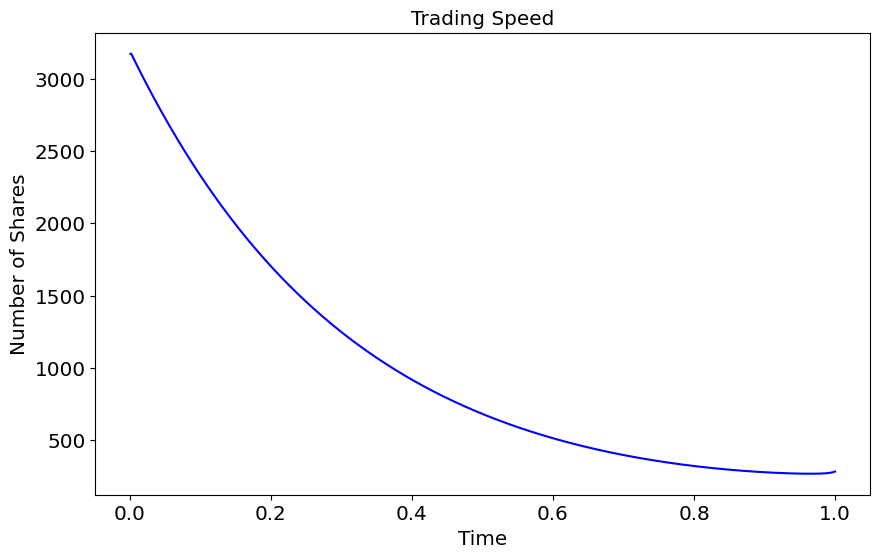

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

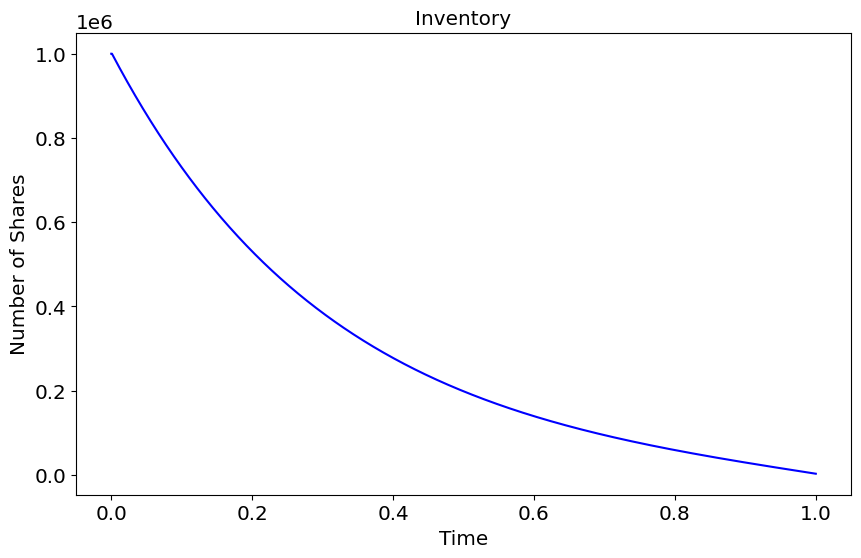

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

### Inventory under optimal trading speed

In [28]:
# Parameter settings
T = 1      
# 1 Day
Ndt = 6.5 * 5000
# 6.5 Trading Hour; 5000second: we can trade every second; 

dt = T / Ndt
t = np.arange(0, T + dt, dt)
# dt is the difference
k = 1e-3
# Parameter we set for temporary price impact
b = 0.001
# Parameter we set for permenent price impact
tau = T - t
# Time left
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-5, 0.1])
symb = np.array(["o", "*"])

alpha = 0.1
# Terminal Penalty

We show the change of the agent's inventory under the optimal trading strategy with the running penalty phi as alpha changes.

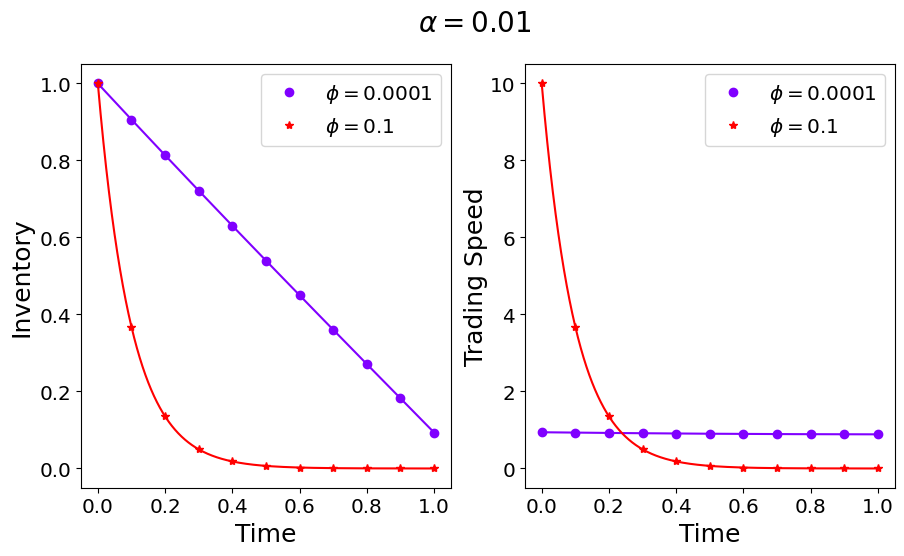

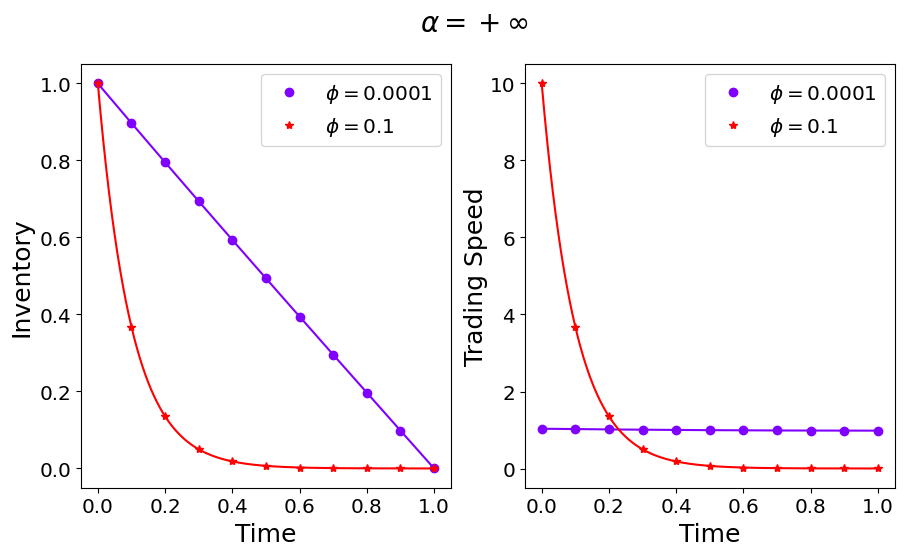

In [29]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(1000000, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")